Current year:2017, month: 5, date: 7/20-17-/5


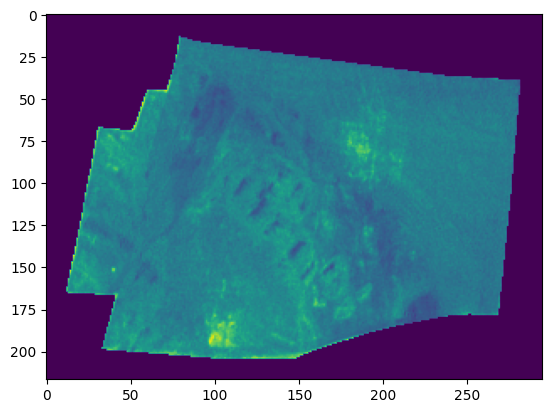

Current year:2017, month: 6, date: 7/20-17-/6


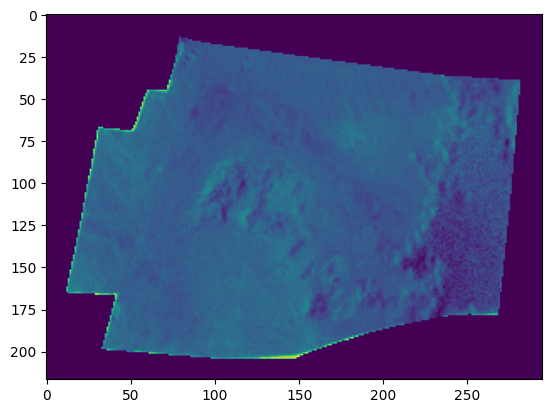

Current year:2017, month: 7, date: 7/20-17-/7


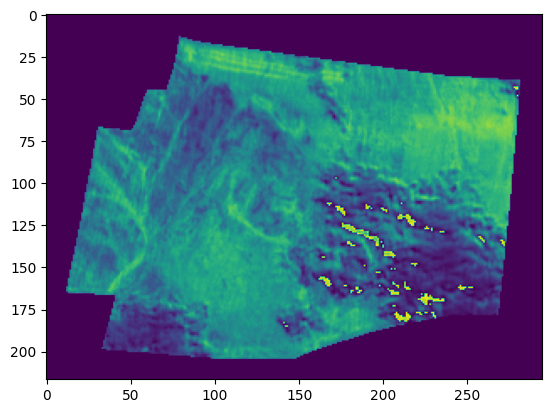

Current year:2017, month: 8, date: 7/20-17-/8


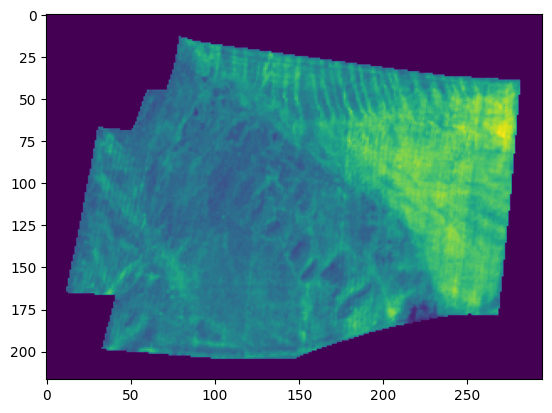

Current year:2017, month: 9, date: 7/20-17-/9


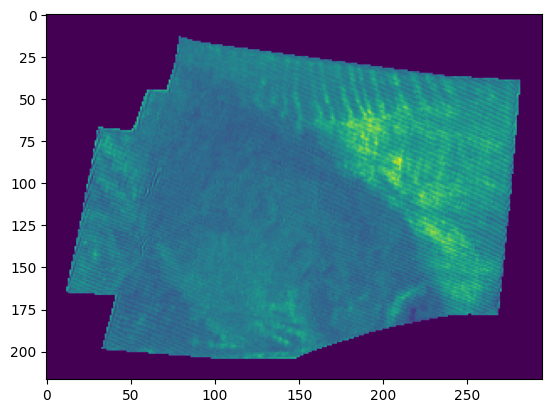

Current year:2017, month: 10, date: 7/20-17-/1


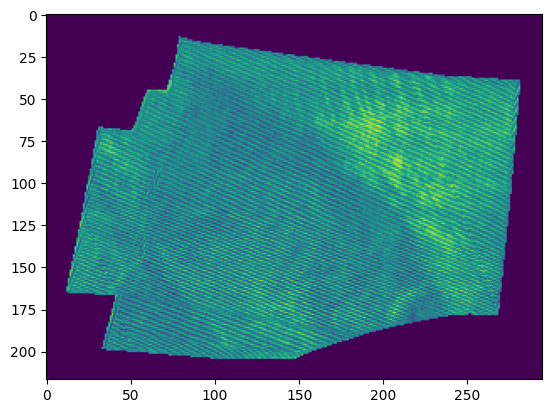

Current year:2018, month: 5, date: 7/20-18-/5


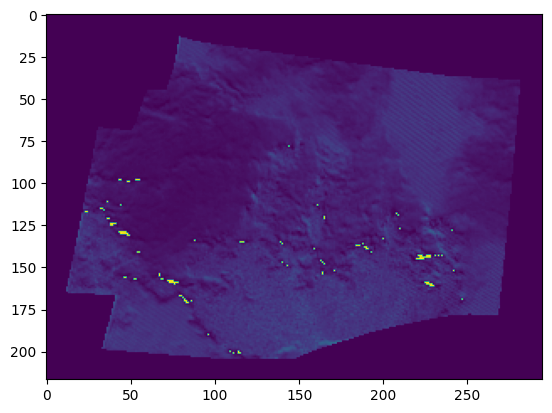

Current year:2018, month: 6, date: 7/20-18-/6


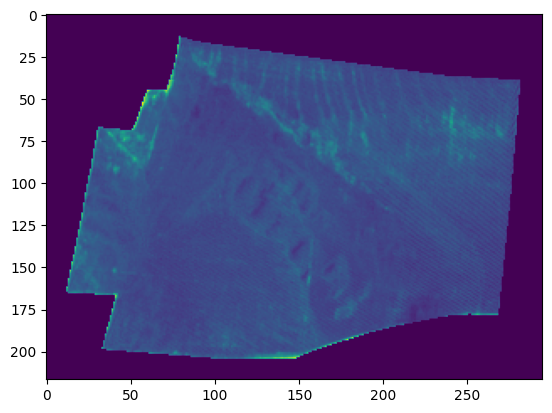

Current year:2018, month: 7, date: 7/20-18-/7


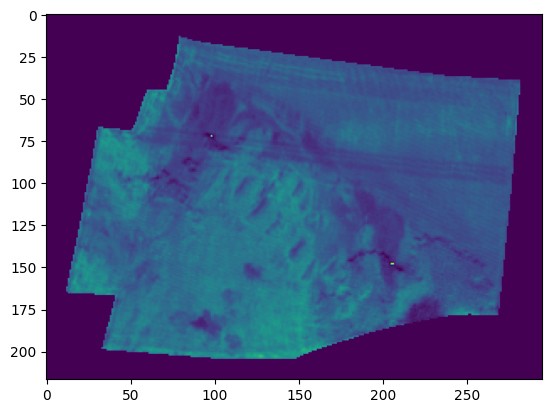

Current year:2018, month: 8, date: 7/20-18-/8


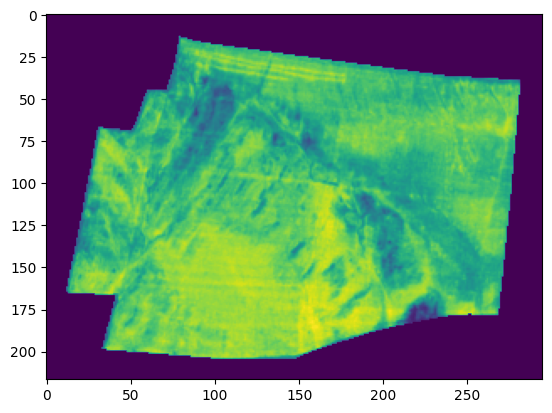

Current year:2018, month: 9, date: 7/20-18-/9


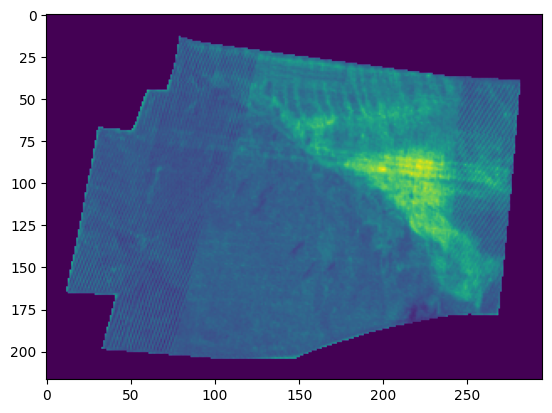

Current year:2018, month: 10, date: 7/20-18-/1


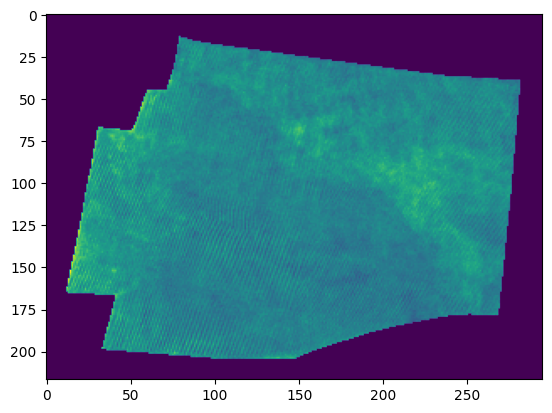

Current year:2019, month: 5, date: 7/20-19-/5


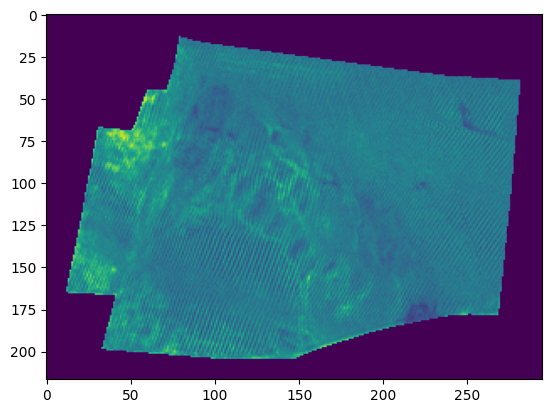

Current year:2019, month: 6, date: 7/20-19-/6


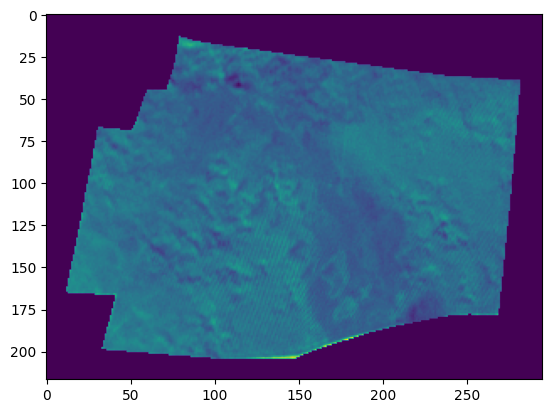

Current year:2019, month: 7, date: 7/20-19-/7


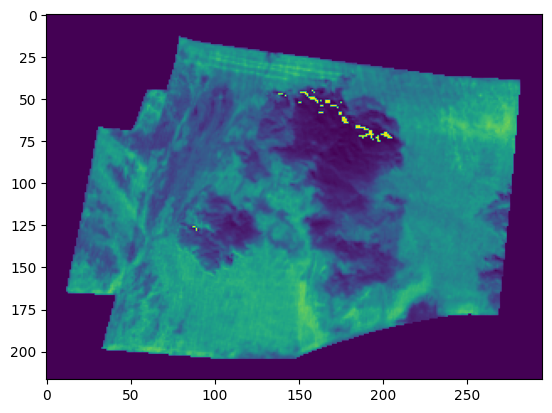

Current year:2019, month: 8, date: 7/20-19-/8


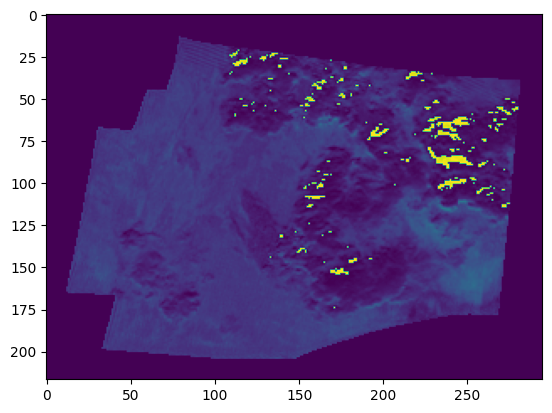

Current year:2019, month: 9, date: 7/20-19-/9


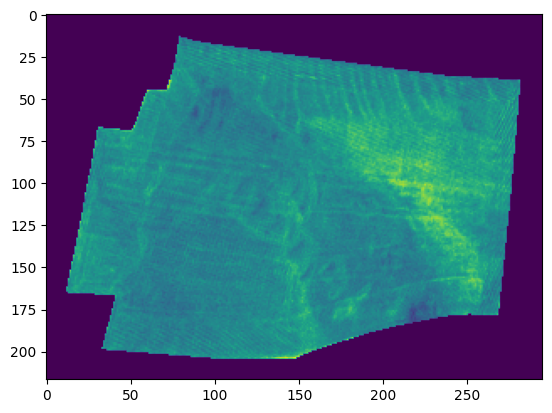

Current year:2020, month: 5, date: 7/20-20-/5


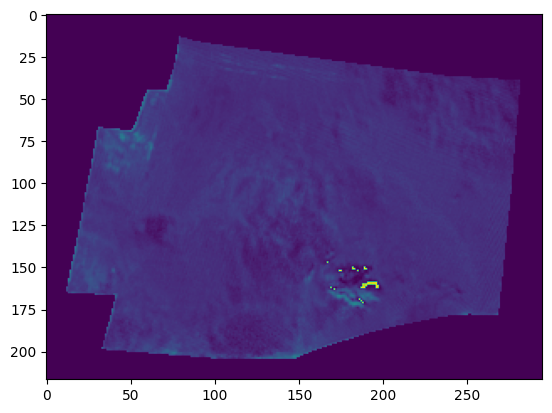

Current year:2020, month: 6, date: 7/20-20-/6


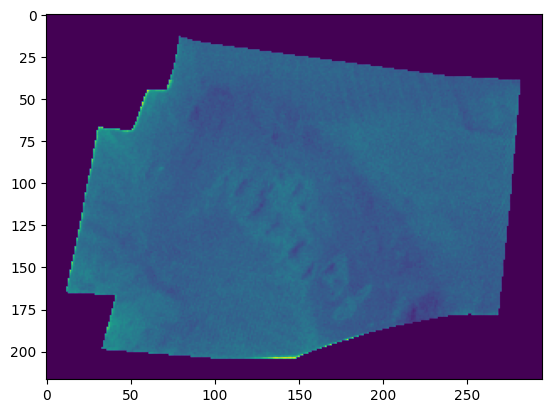

Current year:2020, month: 7, date: 7/20-20-/7


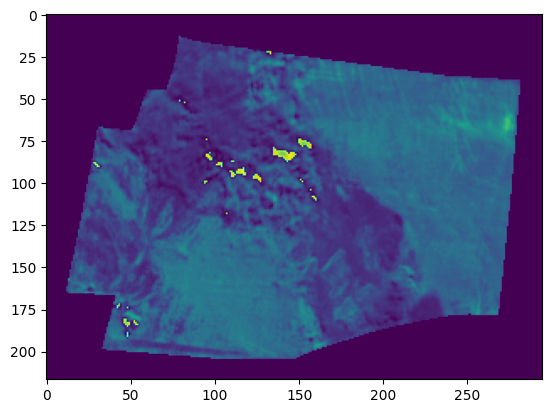

Current year:2020, month: 8, date: 7/20-20-/8


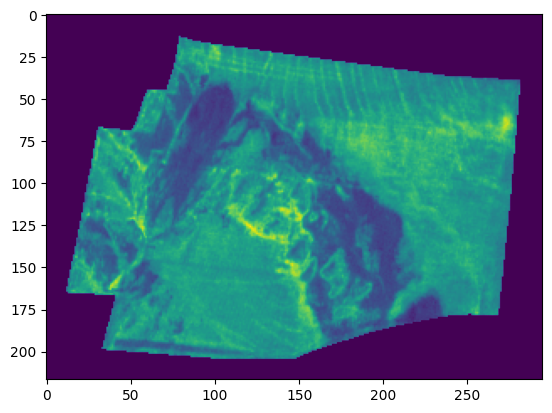

Current year:2020, month: 9, date: 7/20-20-/9


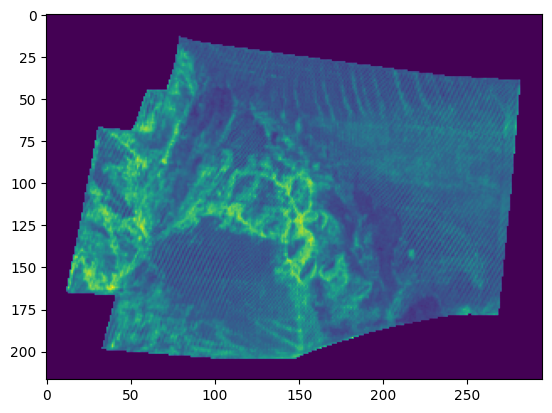

Current year:2021, month: 5, date: 7/20-21-/5


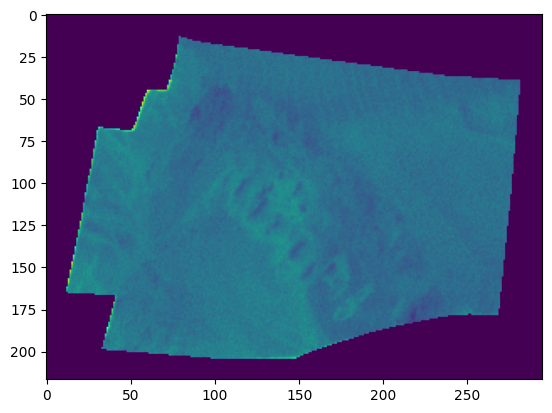

Current year:2021, month: 6, date: 7/20-21-/6


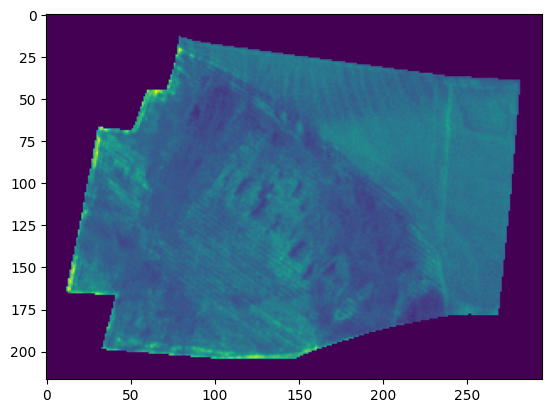

Current year:2021, month: 7, date: 7/20-21-/7


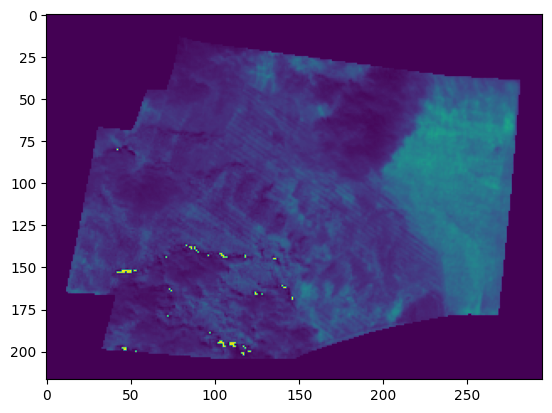

Current year:2021, month: 8, date: 7/20-21-/8


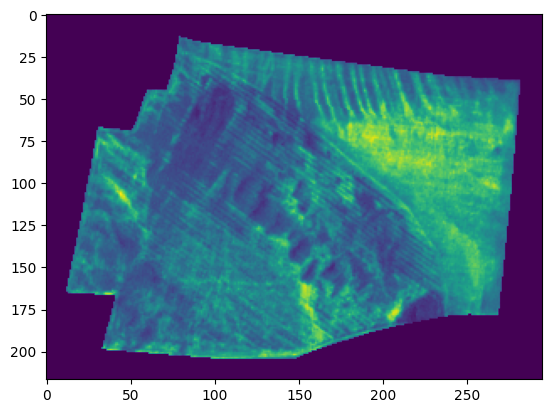

Current year:2021, month: 9, date: 7/20-21-/9


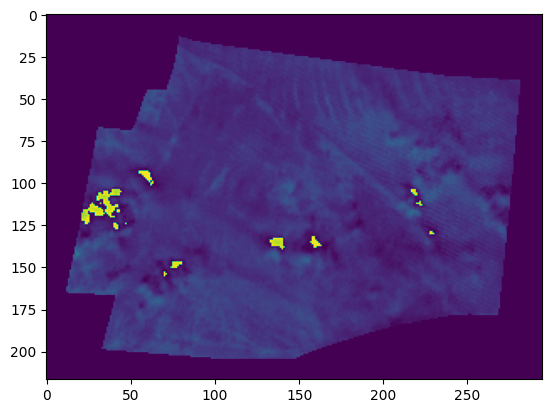

Current year:2021, month: 10, date: 7/20-21-/1


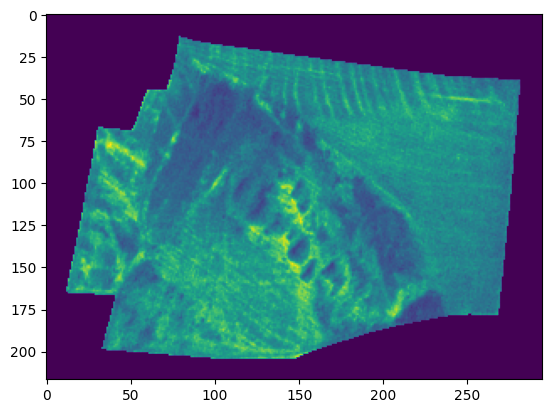

Current year:2022, month: 8, date: 7/20-22-/8


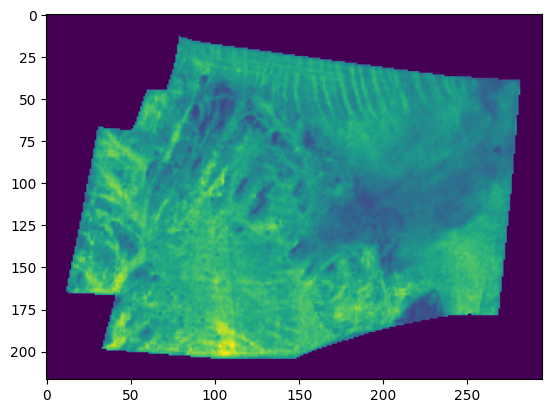

Current year:2022, month: 9, date: 7/20-22-/9


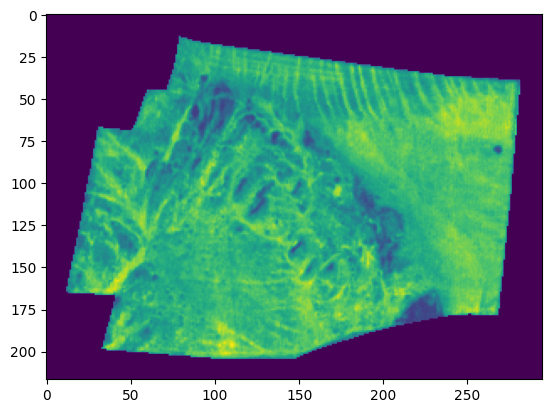

Current year:2022, month: 10, date: 7/20-22-/1


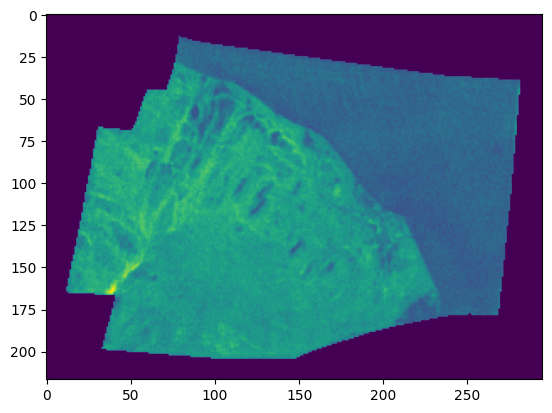

In [81]:
import os, glob 
import json
import rasterio as rio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt

list_years = [2017, 2018, 2019, 2020, 2021, 2022] 
list_months = [5, 6, 7, 8, 9, 10] 
path = "C:/Users/Acer/Desktop/github/aitu_hackday_rid/data/field_61424_21b8205863023cb1dadb03ba6fe57657/"
for year in list_years: 
    # print(year)
    for month in list_months: 
        # print(month)
        for filename in glob.glob(os.path.join(f'{path}{year}/{month}/*', '*.json')): 
            # print(filename)
            with open(filename) as f: 
                data = json.load(f) 
            print(f'Current year:{year}, month: {month}, date: {filename[94:98]}-{filename[98:100]}-{filename[100:102]}') 
            show((np.array(data)*255).astype(np.uint8))
            break

In [82]:
imgxyb = data

In [83]:
imgxyb = np.array(imgxyb)

In [84]:
img1d = imgxyb[:1, :, :].reshape((imgxyb.shape[1]*imgxyb.shape[2], imgxyb.shape[0]))

In [53]:
from sklearn import cluster

cl = cluster.KMeans(n_clusters=3) # create an object of the classifier
param = cl.fit(img1d) # train it
img_cl = cl.labels_ # get the labels of the classes
img_cl = img_cl.reshape(imgxyb[0,:,:].shape) 

In [89]:
cl.labels_


array([0, 0, 0, ..., 0, 0, 0])

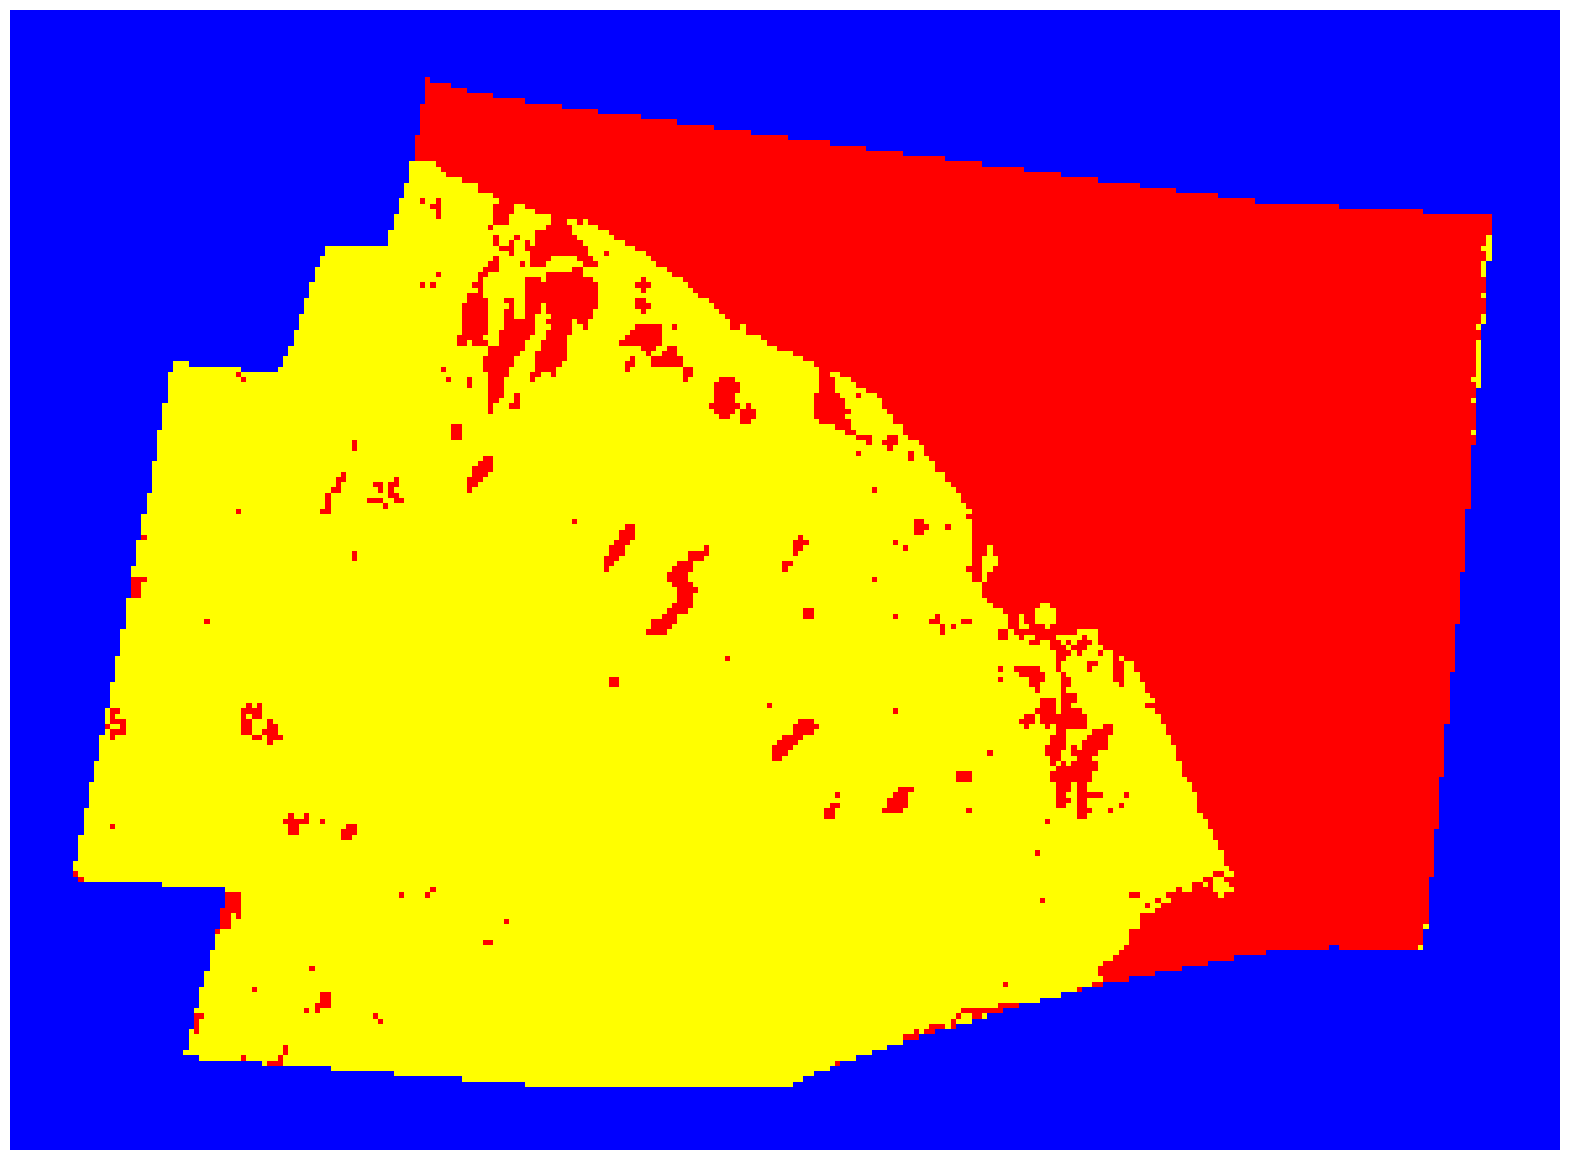

In [57]:
import matplotlib.colors as mc

# Create a custom color map to represent our different 4 classes
cmap = mc.LinearSegmentedColormap.from_list("", ["blue","yellow","red"])
# Show the resulting array and save it as jpg image
plt.figure(figsize=[20,20])
plt.imshow(img_cl, cmap=cmap)
plt.axis('off')
plt.savefig("elhas_clustered.jpg", bbox_inches='tight')
plt.show()

In [ ]:
# open the raster image
elmanagel = rio.open(r"C:/Users/Acer/Desktop/github/aitu_hackday_rid/data/31-07-2021_8-2.tif")
# create an empty array with same dimensions and data type 
elman_xyb = np.empty((elmanagel.height, elmanagel.width, elmanagel.count), elmanagel.meta['dtype'])
# loop through the raster bands and fill the empty array in x-y-bands order
for band in range(elman_xyb.shape[2]):
    elman_xyb[:,:,band] = elmanagel.read(band+1)
# convert to 1d array
elman_1d = elman_xyb[:,:,:4].reshape(elman_xyb.shape[0]*elman_xyb.shape[1], elman_xyb.shape[2])
# predict the clusters in the image 
pred = cl.predict(elman_1d)
# reshape the 1d array predictions to x-y-bands shape order (only one band)
elman_cul = pred
elman_cul = elman_cul.reshape(elman_xyb[:,:,0].shape)

In [62]:
filename = "C:/Users/Acer/Desktop/github/aitu_hackday_rid/data/field_61424_21b8205863023cb1dadb03ba6fe57657/2018/5/S2A_MSIL2A_20180506T063631_N9999_R120_T42UVC_20221121T100456/info.json"
with open(filename) as f:
    data = json.load(f) 
imgxyb = np.array(data)
img1d = imgxyb[:1, :, :].reshape((imgxyb.shape[1]*imgxyb.shape[2], imgxyb.shape[0]))

In [64]:
pred = cl.predict(img1d)
# reshape the 1d array predictions to x-y-bands shape order (only one band)
elman_cul = pred
elman_cul = elman_cul.reshape(imgxyb[0,:,:].shape)

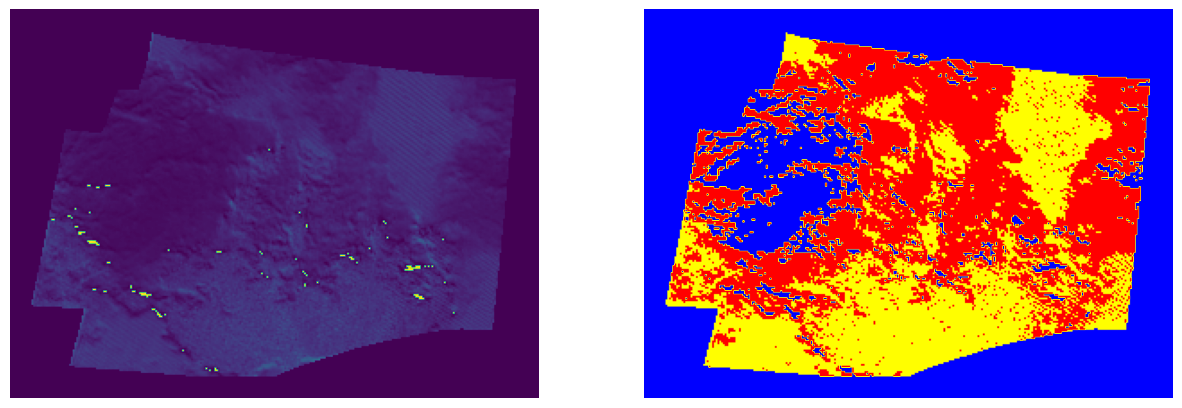

In [68]:
fig, (ax1,ax2) = plt.subplots(figsize=[15,15], nrows=1, ncols=2, sharey=False,)
show((np.array(data)*255).astype(np.uint8), ax=ax1)
show(elman_cul, cmap=cmap, ax=ax2)
ax1.set_axis_off()
ax2.set_axis_off()
fig.savefig("pred.png", bbox_inches='tight')
plt.show()